<a href="https://colab.research.google.com/github/yongjulee0213/ale_python_interface/blob/master/C1_W4_Lab_1_image_generator_with_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#download training data
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-09-25 07:12:42--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.28.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   248MB/s    in 0.6s    

2022-09-25 07:12:43 (248 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [57]:
#download validation data
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-09-25 07:12:43--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.28.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip.1’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2022-09-25 07:12:43 (95.2 MB/s) - ‘validation-horse-or-human.zip.1’ saved [11480187/11480187]



In [58]:
#unzip
import zipfile

#unzip training data
local_zip='/content/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/horse-or-human')

#unzip validation data
loacal_zip='/content/validation-horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/validation-horse-of-human')
zip_ref.close()

In [59]:
#the name of label == the name of file
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('/content/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('/content/horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('/content/validation-horse-of-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('/content/validation-horse-of-human/humans')

In [60]:
#check the filesnames weather horese and humans training directions

#training
print("training: ")
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names=os.listdir(train_human_dir)
print(train_human_names[:10])

print("\nvalidation: ")
vali_horse_names=os.listdir(validation_horse_dir)
print(vali_horse_names[:10])

vali_human_names=os.listdir(validation_human_dir)
print(vali_human_names[:10])


#output : labelnumber-number.png

training: 
['horse30-2.png', 'horse07-3.png', 'horse03-7.png', 'horse24-8.png', 'horse32-7.png', 'horse22-5.png', 'horse31-8.png', 'horse25-3.png', 'horse08-4.png', 'horse39-6.png']
['human15-29.png', 'human13-09.png', 'human12-06.png', 'human03-19.png', 'human09-30.png', 'human08-28.png', 'human12-20.png', 'human04-27.png', 'human15-16.png', 'human06-15.png']

validation: 
['horse30-2.png', 'horse07-3.png', 'horse03-7.png', 'horse24-8.png', 'horse32-7.png', 'horse22-5.png', 'horse31-8.png', 'horse25-3.png', 'horse08-4.png', 'horse39-6.png']
['human15-29.png', 'human13-09.png', 'human12-06.png', 'human03-19.png', 'human09-30.png', 'human08-28.png', 'human12-20.png', 'human04-27.png', 'human15-16.png', 'human06-15.png']


In [61]:
#디렉토리에 있는 이미지 수 출력

#trainig
print('total training horse images: ',len(os.listdir(train_horse_dir)))
print('total training human images: ',len(os.listdir(train_human_dir)))

#validation
print('total validation horse images : ',len(os.listdir(vali_horse_dir)))
print('total validation human images: ', len(os.listdir(vali_human_dir)))

total training horse images:  500
total training human images:  527
total validation horse images :  500
total validation human images:  527


In [62]:
#몇개의 이미지 둘러보기
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameters for 4*4 graph
nrows=4
ncols=4

#index for interating over images
pic_index=0

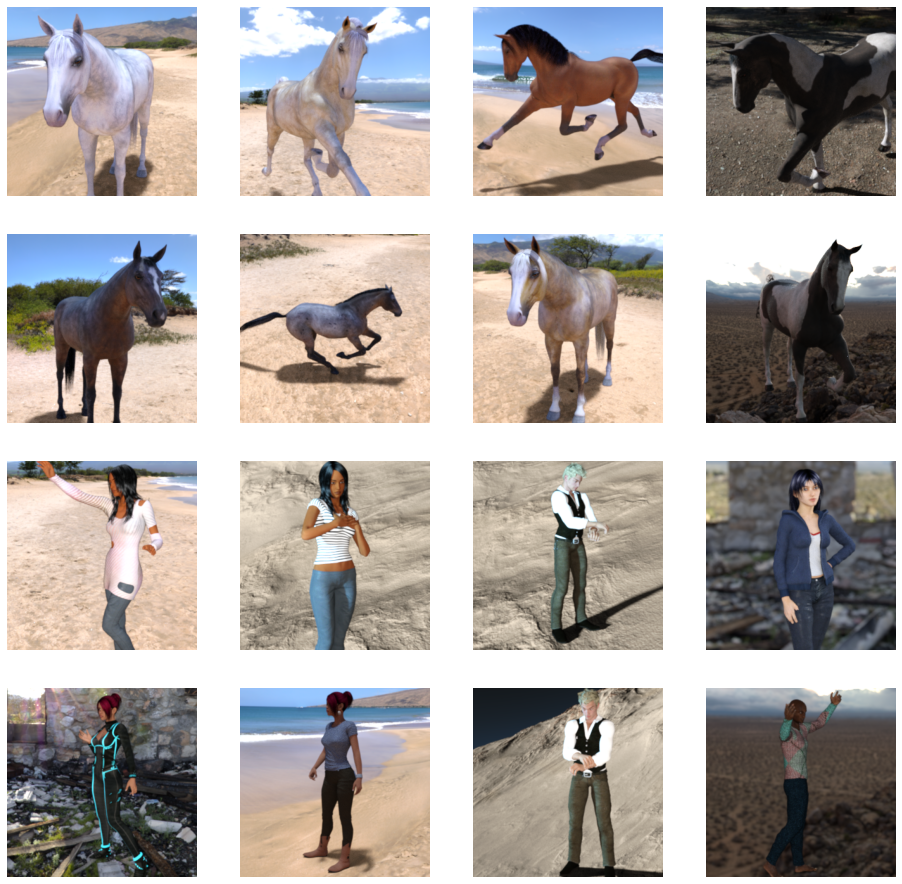

In [63]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [64]:
#build the model

In [65]:
import tensorflow as tf

In [66]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [67]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [68]:
#data preprocessing
#set up the data generator -> convert float32 tensor -> feed the tensor data to model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

#validation generator
validation_generator=validation_datagen.flow_from_directory(
    '/content/validation-horse-of-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


In [69]:
#training
history=model.fit(train_generator, steps_per_epoch=8,epochs=15, verbose=1,validation_data=validation_generator, validation_steps=8)

Epoch 1/15
8/8 [==============================] - 91s 10s/step - loss: 0.7573 - accuracy: 0.4917 - val_loss: 0.6398 - val_accuracy: 0.7266
Epoch 2/15
8/8 [==============================] - 86s 10s/step - loss: 0.8389 - accuracy: 0.6207 - val_loss: 0.6746 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 80s 10s/step - loss: 0.7094 - accuracy: 0.6919 - val_loss: 0.3950 - val_accuracy: 0.8320
Epoch 4/15
8/8 [==============================] - 90s 11s/step - loss: 0.5590 - accuracy: 0.7412 - val_loss: 0.4498 - val_accuracy: 0.9023
Epoch 5/15
8/8 [==============================] - 80s 10s/step - loss: 0.3897 - accuracy: 0.8565 - val_loss: 0.2328 - val_accuracy: 0.8789
Epoch 6/15
8/8 [==============================] - 80s 11s/step - loss: 0.1683 - accuracy: 0.9288 - val_loss: 0.2159 - val_accuracy: 0.8984
Epoch 7/15
8/8 [==============================] - 80s 10s/step - loss: 0.8470 - accuracy: 0.8754 - val_loss: 0.3526 - val_accuracy: 0.8633
Epoch 8/15
8/8 [===========

In [70]:
#make prediction
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path, target_size=(300,300))
  x=image.img_to_array(img)
  x/=255
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn+" is a human")
  else:
    print(fn+" is a horse")

Saving horse.jpg to horse (2).jpg
[0.00016853]
horse.jpg is a horse
